In [1]:
import os
import urllib.request
from species import SpeciesInit
from species.data.database import Database
from species.fit.fit_model import FitModel
from species.read.read_model import ReadModel
from species.plot.plot_mcmc import plot_posterior
from species.plot.plot_spectrum import plot_spectrum
from species.util.box_util import update_objectbox
from species.util.fit_util import get_residuals, multi_photometry

SpeciesInit()

[osx-summer2410.stsci.edu:43242] shmem: mmap: an error occurred while determining whether or not /var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T//ompi.osx-summer2410.5976/jf.0/751894528/sm_segment.osx-summer2410.5976.2cd10000.0 could be created.


species v0.8.4

Working folder: /Users/bseamons/Documents/Research

Configuration file: /Users/bseamons/Documents/Research/species_config.ini
Database file: /Users/bseamons/Documents/Research/species_database.hdf5
Data folder: /Users/bseamons/Documents/Research/data

Configuration settings:
   - Database: /Users/bseamons/Documents/Research/species_database.hdf5
   - Data folder: /Users/bseamons/Documents/Research/data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py installed
Process number 1 out of 1...


In [2]:
database = Database()
database.add_model(model = 'bt-settl', teff_range = (400., 1000.))


-------------------------
Add grid of model spectra
-------------------------

Database tag: bt-settl
Model name: BT-Settl


/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/data/model_data/model_spectra.py:98: UserWarning: It is recommended to use the CIFIST grid of the BT-Settl, because it is a newer version. In that case, set model='bt-settl-cifist' when using add_model of Database.
  warnings.warn(



Unpacking 31/181 model spectra from BT-Settl (227 MB)...

/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/util/data_util.py:73: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path, members=member_list, numeric_owner=numeric_owner)


 [DONE]

Wavelength range (um) = 0.1 - 100
Sampling (lambda/d_lambda) = 10000
Teff range (K) = 400.0 - 1000.0

Adding BT-Settl model spectra... data/bt-settl/bt-settl_teff_900_logg_5.5_spec.dat 

Grid points stored in the database:
   - Teff = [ 400.  500.  600.  700.  800.  900. 1000.]
   - log(g) = [3.5 4.  4.5 5.  5.5]

Number of grid points per parameter:
   - teff: 7
   - logg: 5

Number of stored grid points: 35
Number of interpolated grid points: 0
Number of missing grid points: 0


In [16]:
database.add_object('WISE J225540', parallax = (70.7, 4.2), flux_density = None,
                    spectrum = {'MOSFIRE': ('Flux_cal_JHK_2M2255-3118_spex_res_species_units.txt', None, 120.)}, deredden = None)


----------
Add object
----------

Object name: WISE J225540
Units: None
Deredden: None
Parallax (mas) = 70.70 +/- 4.20

Spectra:
   - Spectrum:
      - Database tag: MOSFIRE
      - Filename: Flux_cal_JHK_2M2255-3118_spex_res_species_units.txt
      - Data shape: (6122, 3)
      - Wavelength range (um): 1.11 - 2.40
      - Mean flux (W m-2 um-1): 1.15e-24
      - Mean error (W m-2 um-1): 2.83e-26
   - Instrument resolution:
      - MOSFIRE: 120.0


/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/data/database.py:1399: UserWarning: Transposing the data of MOSFIRE because the first instead of the second axis has a length of 3.
  warnings.warn(


In [17]:
fit = FitModel(object_name = 'WISE J225540', model = 'bt-settl',
               bounds = {'teff': (400., 1000.), 'logg': (3.5, 5.5)})


-----------------
Fit model spectra
-----------------

Object name: WISE J225540
Model tag: bt-settl
Binary star: False
Blackbody components: 0
Teff interpolation range: (400.0, 1000.0)

Interpolating MOSFIRE... [DONE]

Fitting 4 parameters:
   - teff
   - logg
   - radius
   - parallax

Uniform priors (min, max):
   - teff = (400.0, 1000.0)
   - logg = (3.5, 5.5)
   - radius = (0.5, 5.0)

Normal priors (mean, sigma):
   - parallax = 70.70 +/- 4.20

Weights for the log-likelihood function:
   - MOSFIRE = 1.00


/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/fit/fit_model.py:493: UserWarning: It is recommended to use the CIFIST grid of the BT-Settl, because it is a newer version. In that case, set model='bt-settl-cifist' when using add_model of Database.
  warnings.warn(


In [18]:
fit.run_multinest(tag = 'WISE J225540', n_live_points = 500)


------------------------------
Nested sampling with MultiNest
------------------------------

Database tag: WISE J225540
Number of live points: 500
Resume previous fit: False
Output folder: multinest/

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  500
 dimensionality =    4
 *****************************************************


N/50 = 45;
tau: [276.15638412]
N/50 = 45;
tau: [79.74312342]


  analysing data from multinest/.txt ln(ev)=  -397388.65658697381      +/-  0.28631073839694438     
 Total Likelihood Evaluations:        53449
 Sampling finished. Exiting MultiNest


Nested sampling global log-evidence: -397388.66 +/- 0.29
Nested importance sampling global log-evidence: -397388.92 +/- 0.39

Sample with the maximum likelihood:
   - Log-likelihood = -397345.87
   - teff = 500.00
   - logg = 5.50
   - radius = 0.98
   - parallax = 67.38

---------------------
Add posterior samples
---------------------

Database tag: WISE J225540
Sampler: multinest
Samples shape: (2246, 4)
Ln(Z): -397388.66 +/- 0.29

Integrated autocorrelation time:
   - teff: 276.16
   - logg: 9.35
   - radius: 4.96
   - parallax: 79.74



---------------------
Get posterior samples
---------------------

Database tag: WISE J225540
Random samples: None
Samples shape: (2246, 4)

Parameters:
   - teff
   - logg
   - radius
   - parallax

Uniform priors (min, max):
   - logg = (3.5, 5.5)
   - radius = (0.5, 5.0)
   - teff = (400.0, 1000.0)

Normal priors (mean, sigma):
   - parallax = (70.7, 4.2)

----------------------------
Plot posterior distributions
----------------------------

Database tag: WISE J225540
Object type: planet
Manual parameters: None

Median parameters:
   - teff = 5.00e+02
   - logg = 5.50e+00
   - radius = 9.60e-01
   - parallax = 6.61e+01

Sample with highest probability:
   - teff = 5.00e+02
   - logg = 5.50e+00
   - radius = 9.83e-01
   - parallax = 6.74e+01


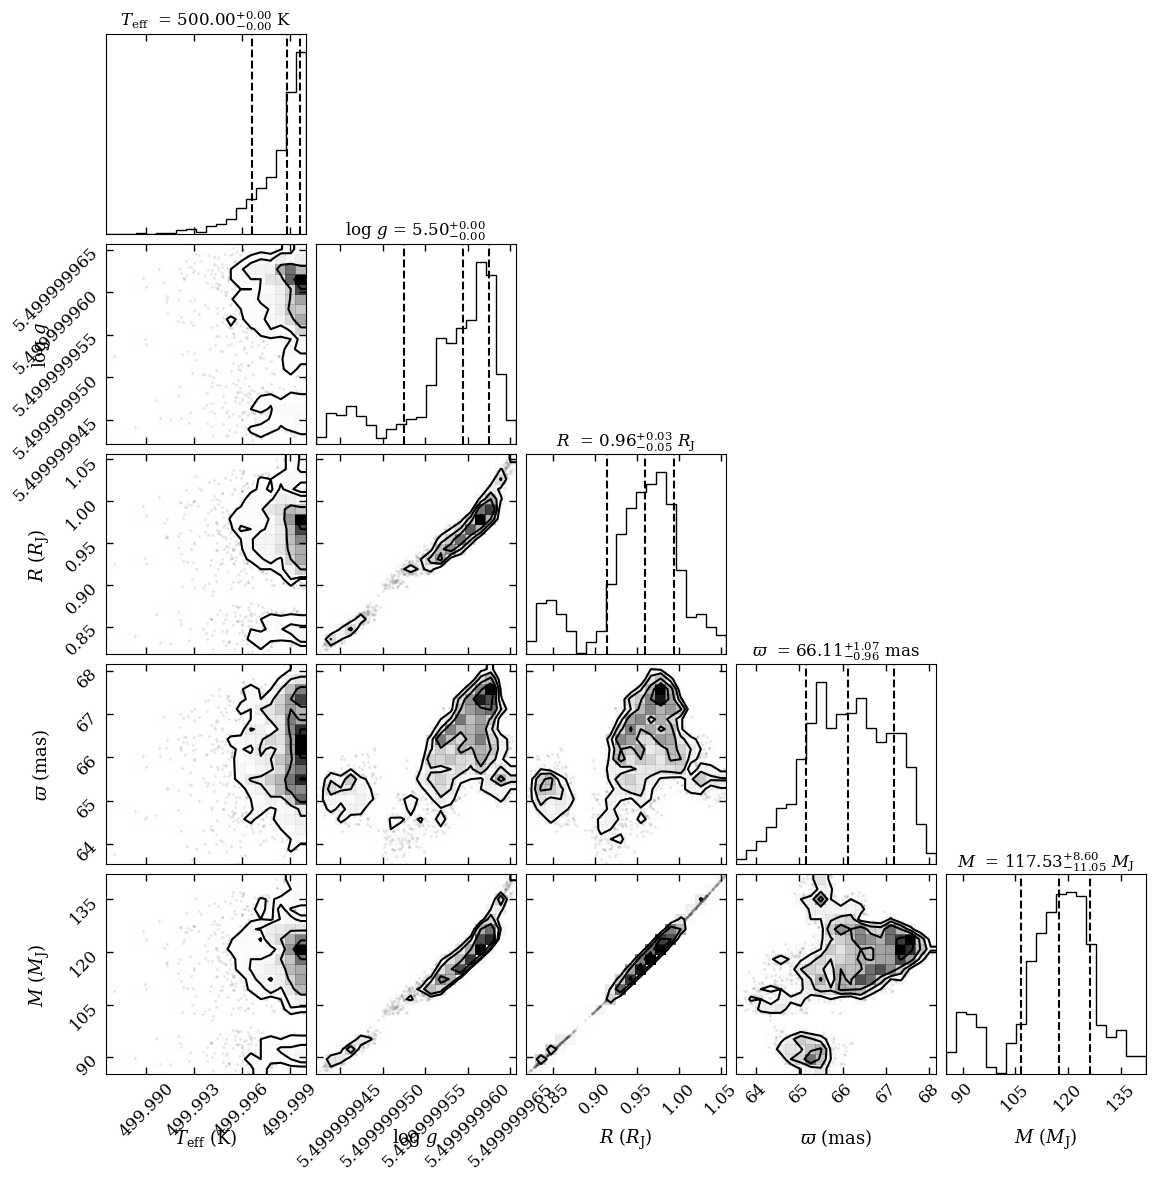

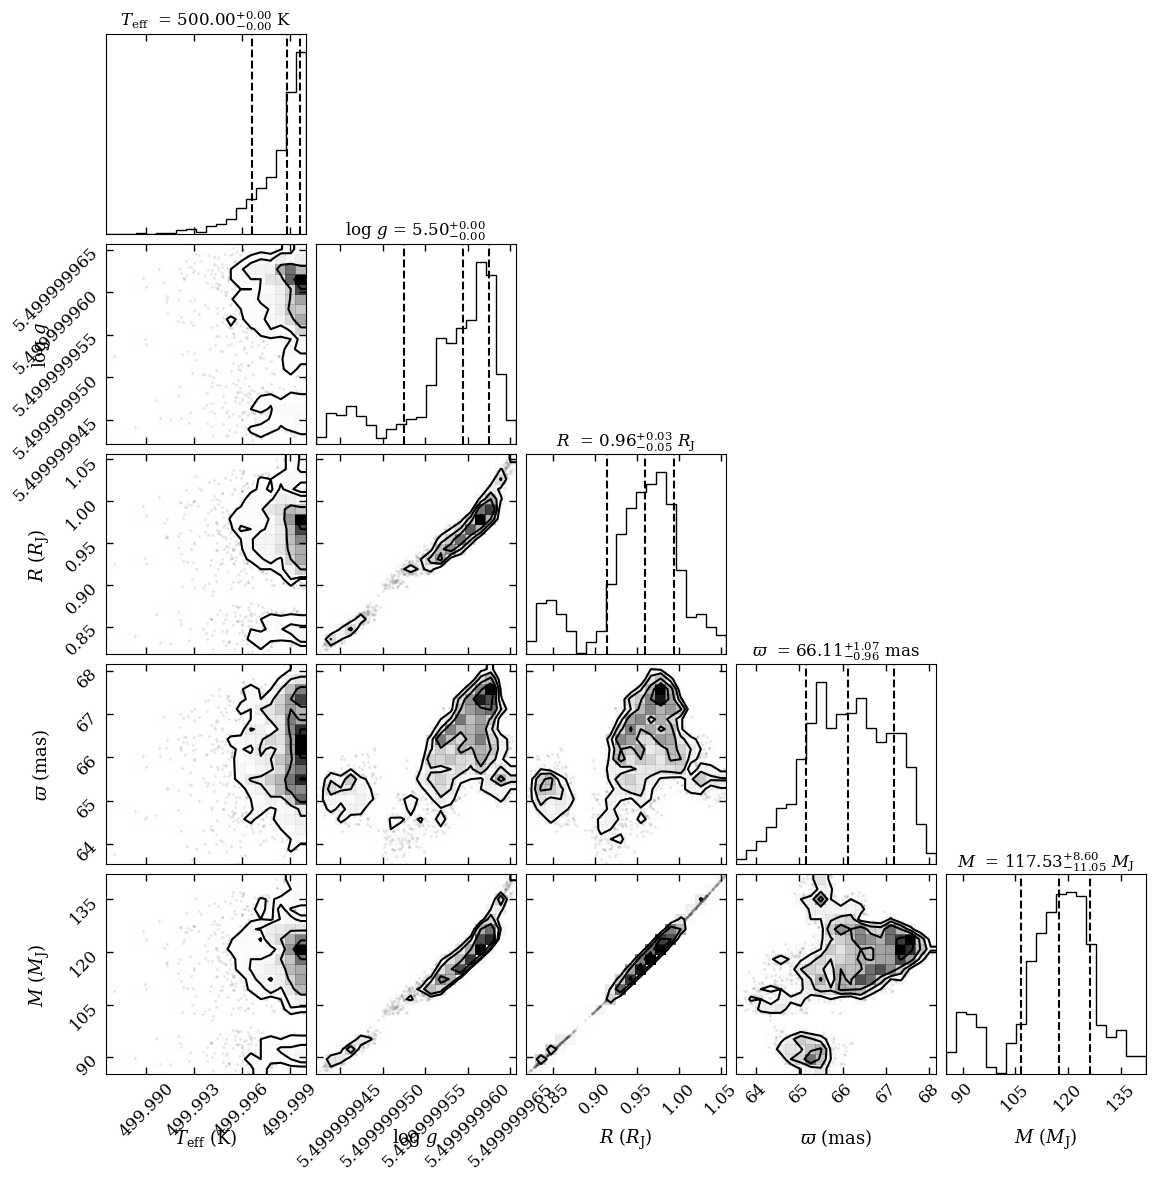

In [20]:
plot_posterior(tag = 'WISE J225540', inc_mass = True, output = None, title_fmt = ['.2f', '.2f', '.2f', '.2f', '.2f'])

In [21]:
samples = database.get_mcmc_spectra(tag = 'WISE J225540', random = 30, wavel_range = None)


---------------------
Get posterior spectra
---------------------

Database tag: WISE J225540
Number of samples: 30
Wavelength range (um): None
Resolution: None



/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/read/read_model.py:71: UserWarning: It is recommended to use the CIFIST grid of the BT-Settl, because it is a newer version. In that case, set model='bt-settl-cifist' when using add_model of Database.
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

In [22]:
best = database.get_median_sample(tag = 'WISE J225540')


---------------------
Get median parameters
---------------------

Database tag: WISE J225540

Parameters:
   - teff = 500.00
   - logg = 5.50
   - radius = 0.96
   - parallax = 66.11


In [23]:
read_model = ReadModel(model = 'bt-settl', wavel_range = None)

In [24]:
modelbox = read_model.get_model(model_param = best, spec_res = 120., smooth = True)

/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/read/read_model.py:613: DeprecationWarning: The 'smooth' parameter has been deprecated. Please set only the 'spec_res' argument, which can be set to None for not applying a smoothing.
  warnings.warn(


In [25]:
objectbox = database.get_object(object_name = 'WISE J225540', inc_spec = True)


----------
Get object
----------

Object name: WISE J225540
Include photometry: True
Include spectra: True


In [26]:
objectbox = update_objectbox(objectbox = objectbox, model_param = best)


----------------
Update ObjectBox
----------------



In [27]:
residuals = get_residuals(tag = 'WISE J225540', datatype = 'model', spectrum = 'bt-settl', parameters = best, objectbox = objectbox, inc_spec = True)


-------------------
Calculate residuals
-------------------


Model: bt-settl
Binary: False

Model parameters:
   - teff
   - logg
   - radius
   - parallax

Fixed parameters: none

Include photometry: True
Include spectra: True

Residuals (sigma):
   - MOSFIRE: min = -31.56, max = 52.00

Number of data points = 6122
Number of model parameters = 4
Number of fixed parameters = 0
Number of degrees of freedom = 6118

chi2 = 1506629.15
reduced chi2 = 246.26


/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/util/fit_util.py:267: DeprecationWarning: The 'datatype' parameter is no longer used by the 'get_residuals' function. Instead, the 'tag' parameter should be set, which points to the sampling results as stored in the database.
  warnings.warn(
/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/util/fit_util.py:277: DeprecationWarning: The 'spectrum' parameter is no longer used by the 'get_residuals' function. Instead, the 'tag' parameter should be set, which points to the sampling results as stored in the database.
  warnings.warn(



-------------
Plot spectrum
-------------

Boxes:
   - ObjectBox
   - ModelBox

Object type: star
Quantity: flux density
Units: ('um', 'W m-2 um-1')
Filter profiles: None

Figure size: (20, 12)
Legend parameters: None
Include model name: False


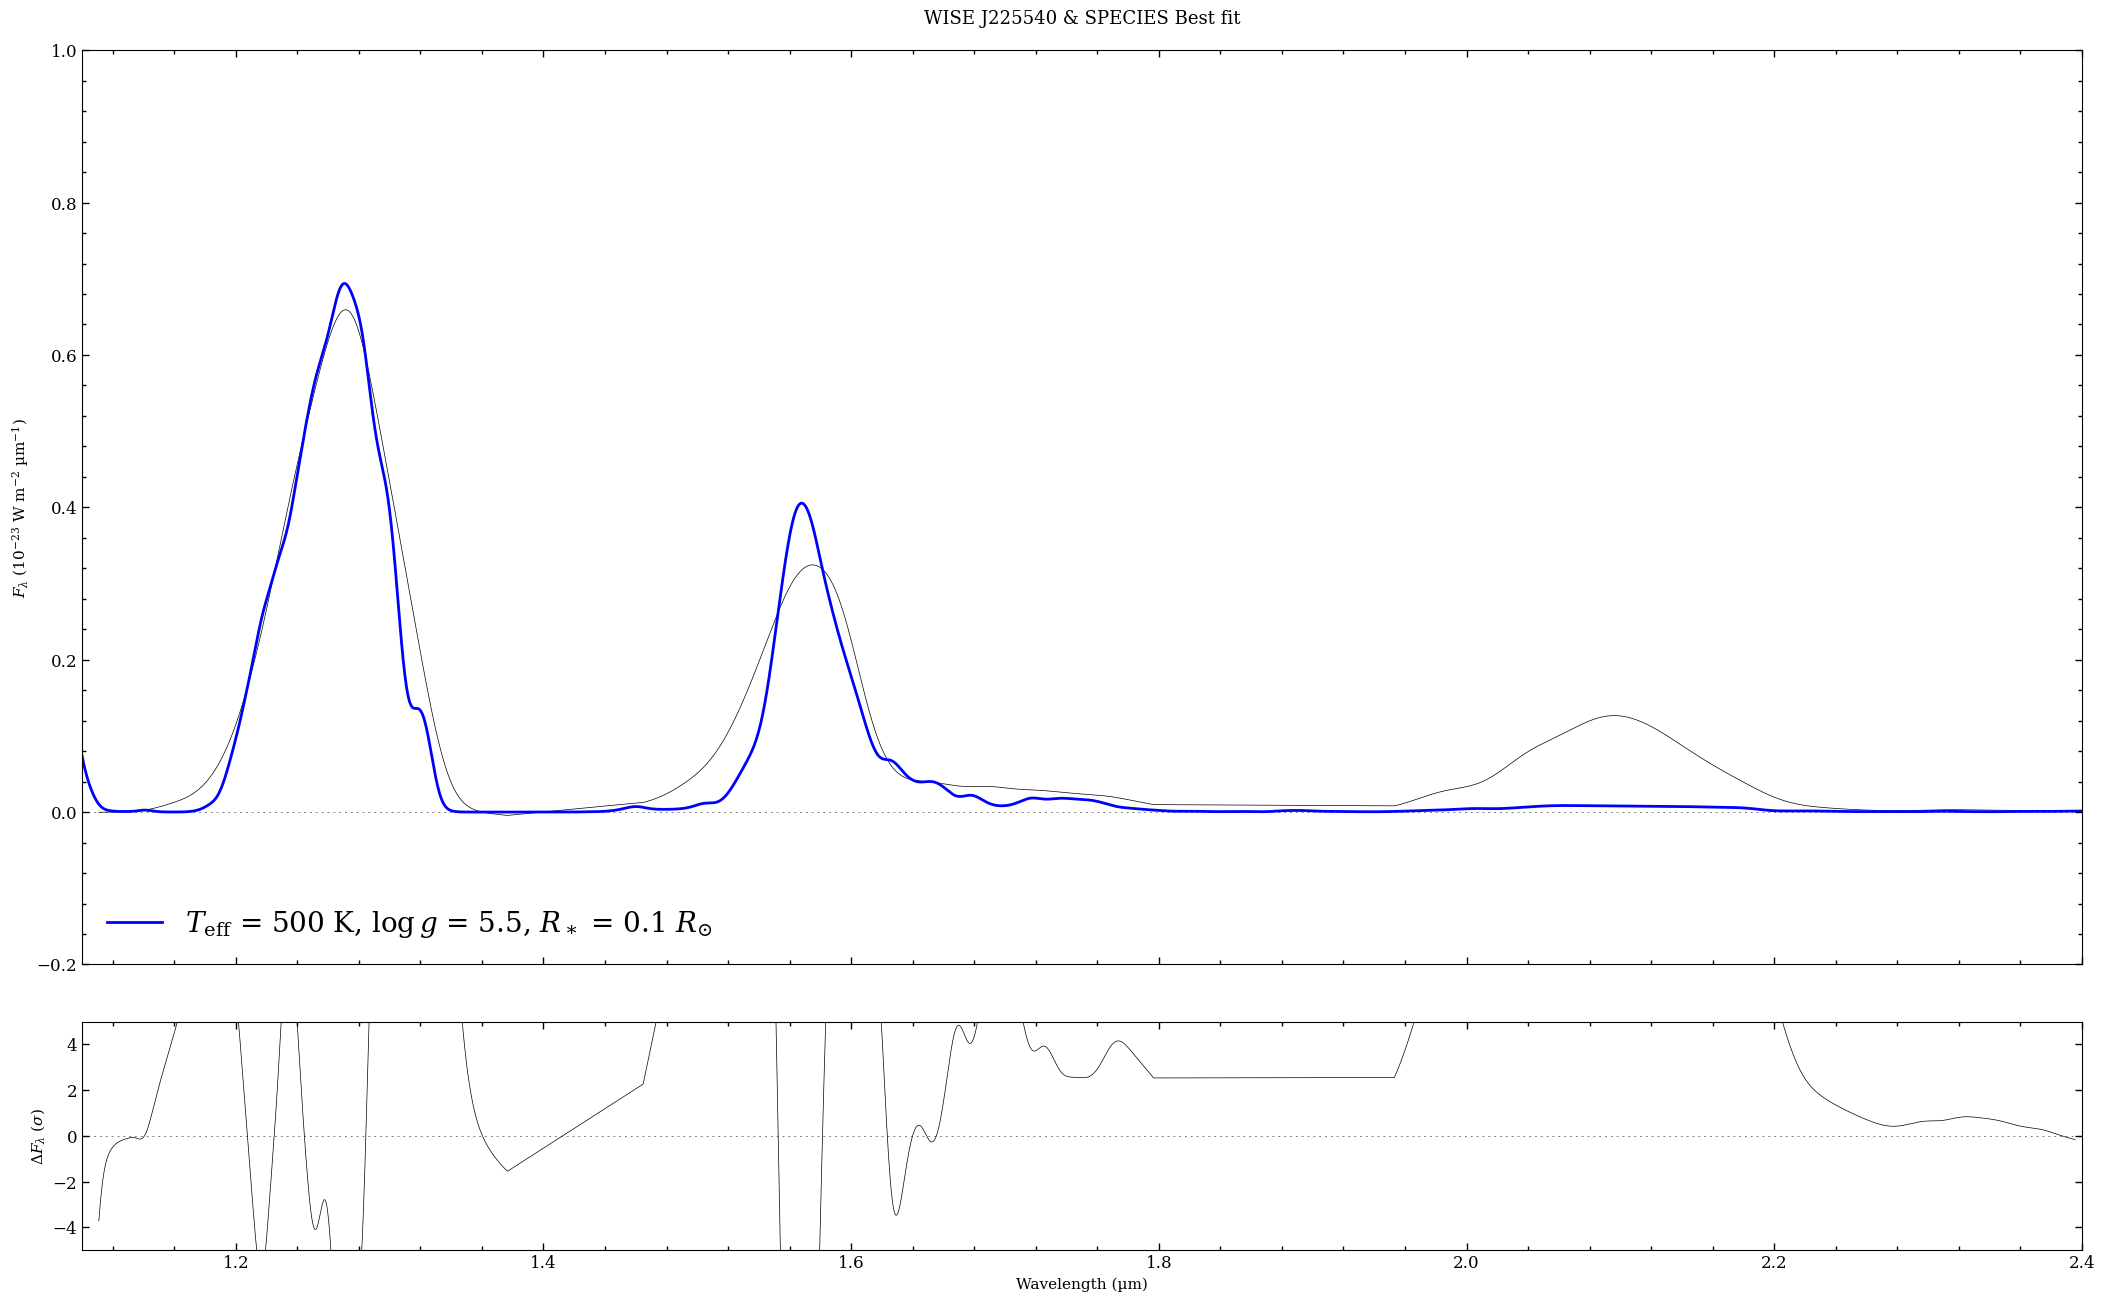

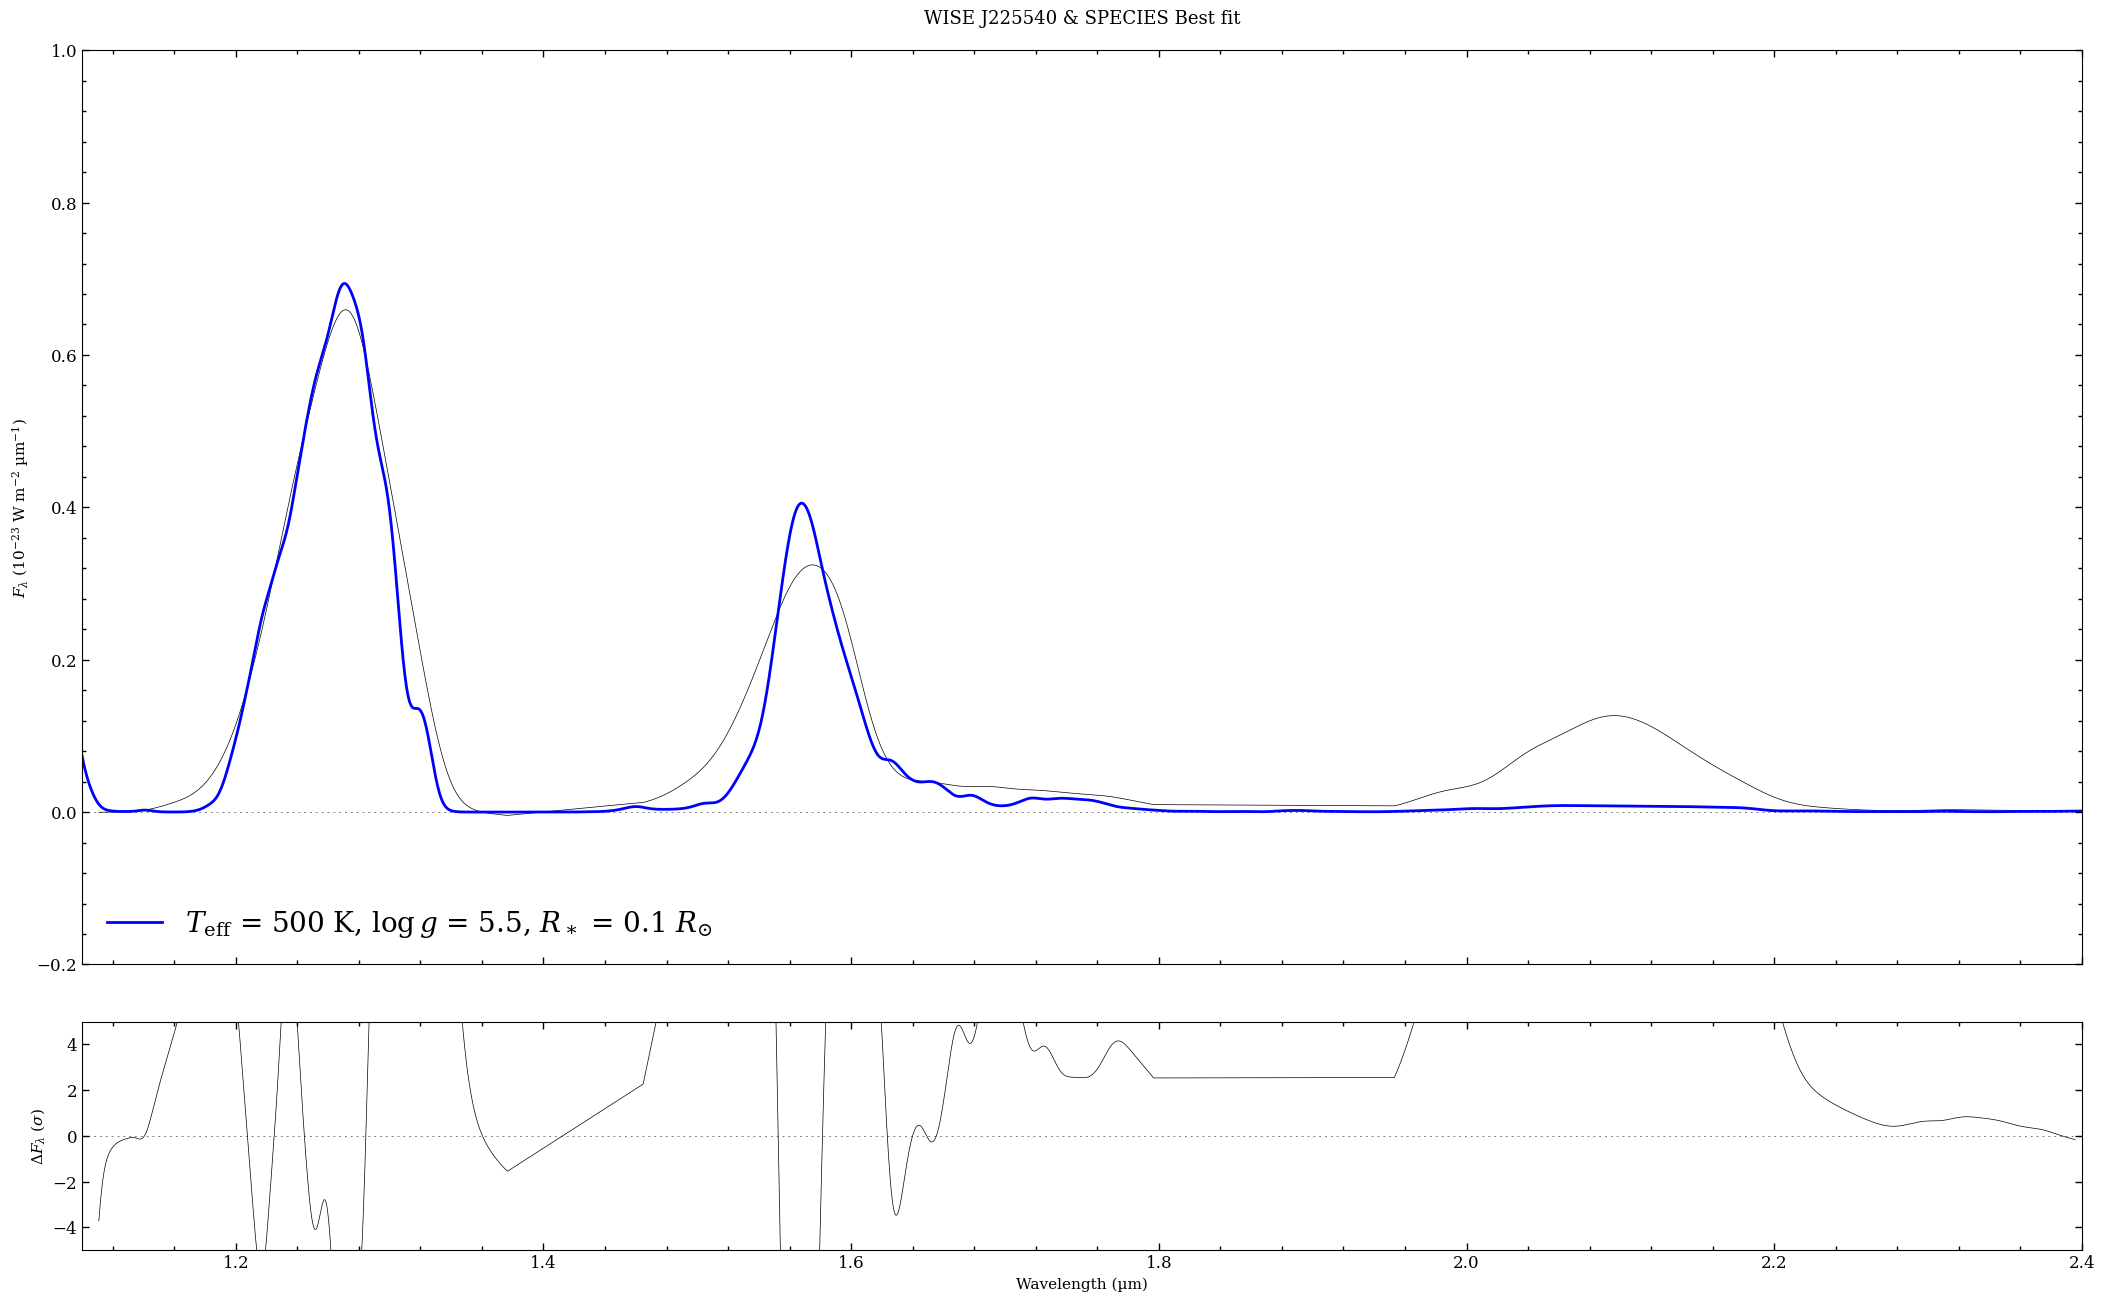

In [28]:
plot_spectrum(boxes = [objectbox, modelbox], quantity = 'flux density', object_type = 'star', residuals = residuals,
              plot_kwargs = [{'MOSFIRE': {'ls': '-', 'lw': 0.5, 'color': 'black'}}, {'ls': '-', 'lw': 2., 'color': 'blue'}],
              legend = [{'loc': 'lower left', 'frameon': False, 'fontsize': 20}, {'loc': 'lower left', 'frameon': False, 'fontsize': 20}],
              output = None, title = 'WISE J225540 & SPECIES Best fit', xlim = (1.1, 2.4), ylim = (-2e-24, 1e-23), figsize = (20, 12))

In [29]:
import numpy as np
model_array = np.array([modelbox.wavelength, modelbox.flux]).T
savepath = './species_bestfit_bt-settl_spexres_model.txt'
np.savetxt(savepath, model_array)